# Arb

A C library for arbitrary-precision ball arithmetic

http://arblib.org/

### The painful way (C)

    #include "arb.h"

    int main()
    {
        arb_t x;
        arb_init(x);
        arb_const_pi(x, 333);
        arb_printn(x, 100, 0);
        printf("\n");
        arb_clear(x);
    }

### Wrappers

* SageMath (RealBallField, ComplexBallField)
* Nemo.jl (ArbField, AcbField)
* Python-FLINT
* ... and others

## Python-FLINT

Very quick installation:

    pip install flint-py

Usage:

In [1]:
from flint import *

arb("0.1") * 10

[1.00000000000000 +/- 3.61e-16]

In [2]:
ctx.dps = 100
x = arb.pi()
print(x)
print(x.sin())
print((x + arb("1e-90")).sin())

[3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068 +/- 3.51e-101]
[+/- 1.72e-101]
[-1.000000000e-90 +/- 6.09e-101]


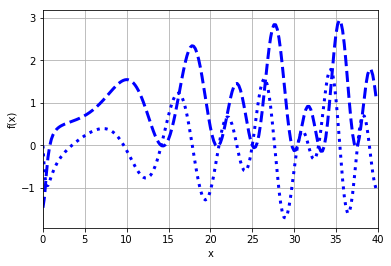

In [3]:
%matplotlib inline
# We evaluate the Riemann zeta function using Arb and plot it using mpmath
from mpmath import plot
ctx.dps = 15
plot(lambda x: acb(0.5 + 1j*x).zeta(), [0,40])

## Example: Hilbert matrices

Textbook example of ill-conditioned matrices:

$$A_{i,j} = \frac{1}{i+j+1}$$


In [4]:
A = arb_mat.hilbert(5,5)

print(A.str(5, radius=False))

[ 1.0000, 0.50000, 0.33333, 0.25000, 0.20000]
[0.50000, 0.33333, 0.25000, 0.20000, 0.16667]
[0.33333, 0.25000, 0.20000, 0.16667, 0.14286]
[0.25000, 0.20000, 0.16667, 0.14286, 0.12500]
[0.20000, 0.16667, 0.14286, 0.12500, 0.11111]


In [5]:
print(A.det())

[3.74929513e-12 +/- 3.68e-21]


### Why ball arithmetic might be useful

In [6]:
from scipy.linalg import hilbert, det
print(det(hilbert(15)))

-2.1491893717231122e-120


In [7]:
print(arb_mat.hilbert(15,15).det())

[+/- 1.06e-89]


### Automatic precision

In [8]:
ctx.dps = 15
while 1:
    H = arb_mat.hilbert(100,100)
    d = H.det()
    print(ctx.dps, d)
    if d.rel_accuracy_bits() > 53:
        break
    ctx.dps *= 2

ctx.dps = 15

15 [+/- 3.20e-417]
30 [+/- 1.69e-767]
60 [+/- 3.53e-1575]
120 [+/- 3.98e-3186]
240 [3.3700336774911741861999225672508298305760992725682801800204310940198298318687928463528636e-5942 +/- 1.77e-6031]


### New feature in Arb 2.16: eigenvalues

In [9]:
arb_mat.hilbert(5,5).eig()

[[1.56705069109823 +/- 8.92e-15] + [+/- 5.27e-15]j,
 [0.2085342186110 +/- 2.01e-14] + [+/- 5.27e-15]j,
 [3.28792877e-6 +/- 7.64e-15] + [+/- 5.27e-15]j,
 [0.00030589804015 +/- 6.67e-15] + [+/- 5.27e-15]j,
 [0.01140749162342 +/- 5.68e-15] + [+/- 5.27e-15]j]

In [10]:
pol = arb_mat.hilbert(5,5).charpoly()
print(pol)
pol.roots()

1.00000000000000*x^5 + ([-1.78730158730159 +/- 4.07e-15])*x^4 + ([0.34759117535903 +/- 3.44e-15])*x^3 + ([-0.00383508350430 +/- 2.74e-15])*x^2 + ([1.15292700e-6 +/- 2.19e-15])*x + ([-3.75e-12 +/- 2.51e-15])


[[+/- 3.78e-5] + [+/- 3.64e-5]j,
 [0.00031 +/- 7.48e-6] + [+/- 3.01e-6]j,
 [0.01140749 +/- 8.57e-9] + [+/- 8.89e-9]j,
 [0.20853422 +/- 3.10e-9] + [+/- 1.82e-9]j,
 [1.56705069 +/- 5.66e-9] + [+/- 5.37e-9]j]

## Example: numerical integration

A function that both mpmath and SciPy have trouble integrating:

$$\int_0^1 \operatorname{sech}^2(10(x-0.2)) + \operatorname{sech}^4(100(x-0.4)) + \operatorname{sech}^6(1000(x-0.6)) \,\, dx \approx 0.210803$$

SciPy gives an error estimate of 3e-9 although the actual error is 0.001

In [11]:
from mpmath import quad, sech, plot
from scipy.integrate import quad as scipy_quad

f = lambda x: sech(10*x-2)**2 + sech(100*x-40)**4 + sech(1000*x-600)**6

print(quad(f, [0,1]))
print(scipy_quad(f, 0, 1))

0.209819784443225
(0.20973606883387982, 3.0281456740012046e-09)


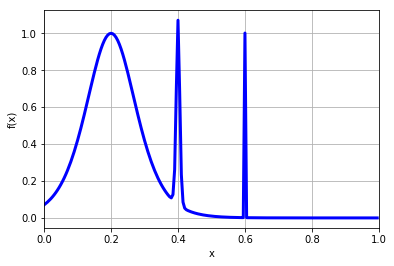

In [12]:
plot(f, [0,1])

### Calculating the integral with Arb

In [13]:
f = lambda x, _: (10*x-2).sech()**2 + (100*x-40).sech()**4 + (1000*x-600).sech()**6

In [14]:
ctx.dps = 15
print(acb.integral(f, 0, 1))

[0.21080273550055 +/- 4.44e-15]


In [15]:
ctx.dps = 100
print(acb.integral(f, 0, 1))

[0.210802735500549277375643255705729154360909186436781190347850505878720613128145500205058689261557642 +/- 5.64e-100]
